In [139]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

#Parameters
x_1=0
x_2=0
dt= 0.001
alpha = 0.05

#Generationg noise
n = 5000000
etha_1 = alpha*np.random.normal(0,1,n)*((dt)**(1/2))
etha_2 = alpha*np.random.normal(0,1,n)*((dt)**(1/2))

#Creating data
datax_1 = []
datax_2 = []
for i in range(n):
  dx_1 = x_2*dt + etha_1[i]
  x_1= x_1+dx_1
  datax_1.append(x_1)
  dx_2 = (0.02*x_1 + 0.03*x_2 - (x_1**3) - (x_1**2)*x_2)*dt + etha_2[i]
  x_2 = x_2+dx_2
  datax_2.append(x_2)

In [ ]:
#Plotting data
plt.plot(datax_1,"#7E2F8E")
plt.xlabel("time")
plt.ylabel("X_1")
plt.title("X_1 according to time")
plt.show()
plt.plot(datax_2,"c")
plt.xlabel("time")
plt.ylabel("X_2")
plt.title("X_2 according to time")
plt.show()
plt.plot(datax_1,"#7E2F8E")
plt.plot(datax_2,"c")
plt.xlabel("time")
plt.ylabel("X_1 , X_2")
plt.title("X_1 and X_2 according to time")
plt.show()
plt.plot(datax_1,datax_2)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("X_2 according to X_1 all data")
plt.show()
plt.plot(datax_1[:200000],datax_2[:200000])
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("X_2 according to X_1, 200000 data")
plt.show()

In [140]:
#Binning and locating data
bins = 51

df1 = datax_1
df2 = datax_2

#Hist values and bin edges
hist_values_1, bin_edges_1 = np.histogram(df1, bins=bins)
hist_values_2, bin_edges_2 = np.histogram(df2, bins=bins)

#make data between 0 and bins for binning
min1 = np.min(df1)
min2 = np.min(df2)

df1 = df1 - min1
df2 = df2 - min2

max1 = np.max(df1)
max2 = np.max(df2)

df1 = df1*(bins)/max1
df2 = df2*(bins)/max2

mask1 = (df1<bins)*(df2<bins)
df1 = df1[mask1]
df2 = df2[mask1]

binmid_list11 = []
binmid_list21 = []

#Calculating middlle of the bins.
for i in range(bins):
  binmid1 = (bin_edges_1[i] + bin_edges_1[i+1]) /2
  binmid_list11.append(binmid1)
  binmid2 = (bin_edges_2[i] + bin_edges_2[i+1]) /2
  binmid_list21.append(binmid2)

In [70]:
#Calculating D_{x_1}^1
DR_1 = np.zeros((bins,bins))
counter_1 = np.zeros((bins,bins))
A_1 = np.zeros((bins,bins))

for i in range(len(df1)-1):
  A_1[int(df1[i]//1)][int(df2[i]//1)] += (df1[i+1]-df1[i])
  counter_1[int(df1[i]//1)][int(df2[i]//1)] += 1

for j in range(bins):
  for k in range(bins):
    if counter_1[j][k] != 0:
      DR_1[j][k] = A_1[j][k]/counter_1[j][k]
      DR_1[j][k] = DR_1[j][k] *max1 / (bins*dt)

In [141]:
x = np.outer(binmid_list11, np.ones(bins))
y = np.outer(binmid_list21, np.ones(bins)).T

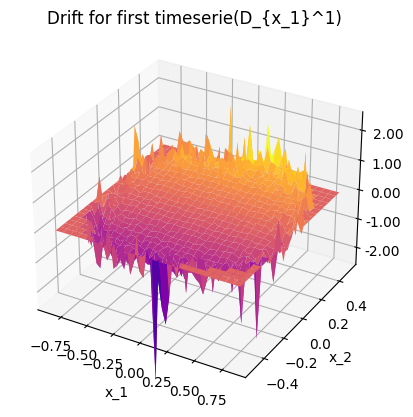

In [71]:
#Plotting with outer
Z = np.array(DR_1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, Z,cmap='plasma')
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim([-2.5, 2.5])
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Drift for first timeserie(D_{x_1}^1)")

plt.show()

In [77]:
#Calculating D_{x_2}^1
DR_2 = np.zeros((bins,bins))
counter_2 = np.zeros((bins,bins))
A_2 = np.zeros((bins,bins))
for i in range(len(df1)-1):
  A_2[int(df1[i]//1)][int(df2[i]//1)] += (df2[i+1]-df2[i])
  counter_2[int(df1[i]//1)][int(df2[i]//1)] += 1

for j in range(bins):
  for k in range(bins):
    if counter_2[j][k] != 0:
      DR_2[j][k] = A_2[j][k]/counter_2[j][k]
      DR_2[j][k] = DR_2[j][k] *max2 / (bins*dt)

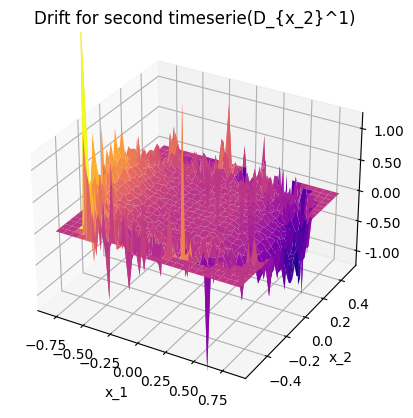

In [84]:
#Plotting with outer
Z = np.array(DR_2)
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, Z,cmap='plasma')
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_zlim([-1.2,1.2])
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Drift for second timeserie(D_{x_2}^1)")
plt.show()

In [105]:
#Calculating D_{11}^2
A_2_11 = [[0 for _ in range(bins)] for _ in range(bins)]
Dif_11 = [[0 for _ in range(bins)] for _ in range(bins)]

for j in range(bins):
  for k in range(bins):
    A_2_11[j][k] = A_1[j][k]*A_1[j][k]
    if counter_1[j][k] != 0:
      Dif_11[j][k] = A_2_11[j][k]/counter_1[j][k]
      Dif_11[j][k] = Dif_11[j][k]*max1*max1 / (bins*bins*dt)
Dif_11 = np.multiply(Dif_11, 0.01)

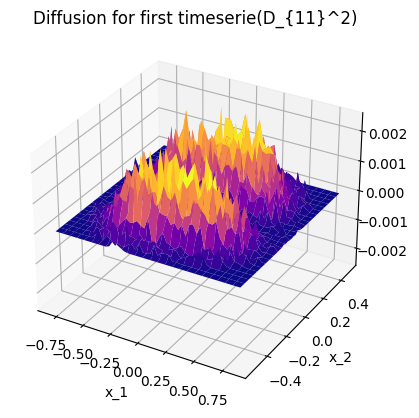

In [107]:
#Plotting with outer
Z = np.array(Dif_11)
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, Z,cmap='plasma')
ax.set_zlim([-0.0025,0.0025])
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Diffusion for first timeserie(D_{11}^2)")

plt.show()

In [142]:
A_2_22 = [[0 for _ in range(bins)] for _ in range(bins)]
Dif_22 = [[0 for _ in range(bins)] for _ in range(bins)]

for j in range(bins):
  for k in range(bins):
    A_2_22[j][k] = A_2[j][k]*A_2[j][k]
    if counter_1[j][k] != 0:
      Dif_22[j][k] = A_2_22[j][k]/counter_2[j][k]
      Dif_22[j][k] = Dif_22[j][k] *max2*max2 / (bins*bins*dt)
Dif_22 = np.multiply(Dif_22, 0.01)

<ipython-input-142-d40d79ce5ed6>:8: RuntimeWarning: invalid value encountered in scalar divide
  Dif_22[j][k] = A_2_22[j][k]/counter_2[j][k]


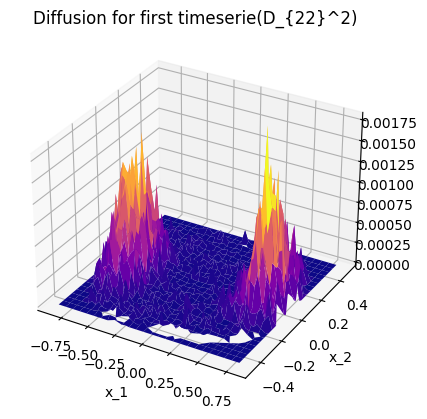

In [143]:
#Plotting with outer
Z = np.array(Dif_22)
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, Z,cmap='plasma')
ax.set_zlim([0,0.0018])
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Diffusion for first timeserie(D_{22}^2)")

plt.show()

In [144]:
A_2_12 = [[0 for _ in range(bins)] for _ in range(bins)]
Dif_12 = [[0 for _ in range(bins)] for _ in range(bins)]

for j in range(bins):
  for k in range(bins):
    A_2_12[j][k] = A_1[j][k]*A_2[j][k]
    if counter_1[j][k] != 0:
      Dif_12[j][k] = A_2_12[j][k]/counter_2[j][k]
      Dif_12[j][k] = Dif_12[j][k] *max1*max2 / (bins*bins*dt)
Dif_12 = np.multiply(Dif_12, 0.01)

<ipython-input-144-bfcadd0e835e>:8: RuntimeWarning: invalid value encountered in scalar divide
  Dif_12[j][k] = A_2_12[j][k]/counter_2[j][k]


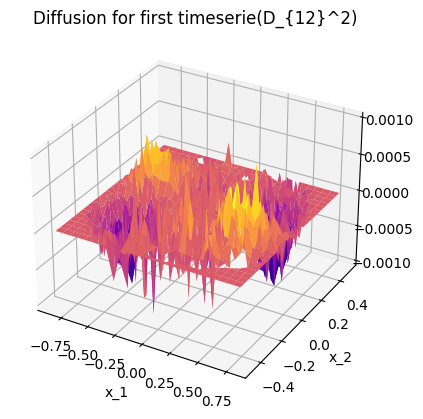

In [149]:
#Plotting with outer
Z = np.array(Dif_12)
ax = plt.axes(projection ='3d')

ax.plot_surface(x, y, Z,cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Diffusion for first timeserie(D_{12}^2)")

plt.show()